<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-the-Matrix" data-toc-modified-id="Generate-the-Matrix-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate the Matrix</a></span></li><li><span><a href="#Filter-in-size" data-toc-modified-id="Filter-in-size-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Filter in size</a></span></li></ul></div>

From Generate Matrix -- in classification

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import os

In [3]:
path='../../16C_spot_data_unlabeled'

In [4]:
def load_all_spots(path):
    df_tot=pd.DataFrame()
    for f in os.listdir(path):
        df=pd.read_csv(os.path.join(path,f))
        df_tot=df_tot.append(df,ignore_index=True)
    return df_tot

In [5]:
df=load_all_spots(path)

In [6]:
df.insert(df.shape[1],"R/B",np.divide(df['R'],df['B']))
df.insert(df.shape[1],"G/B",np.divide(df['G'],df['B']))

# Generate the Matrix

In [7]:
df=df[['R','G','B','R/B','G/B']]

<Figure size 1440x1440 with 0 Axes>

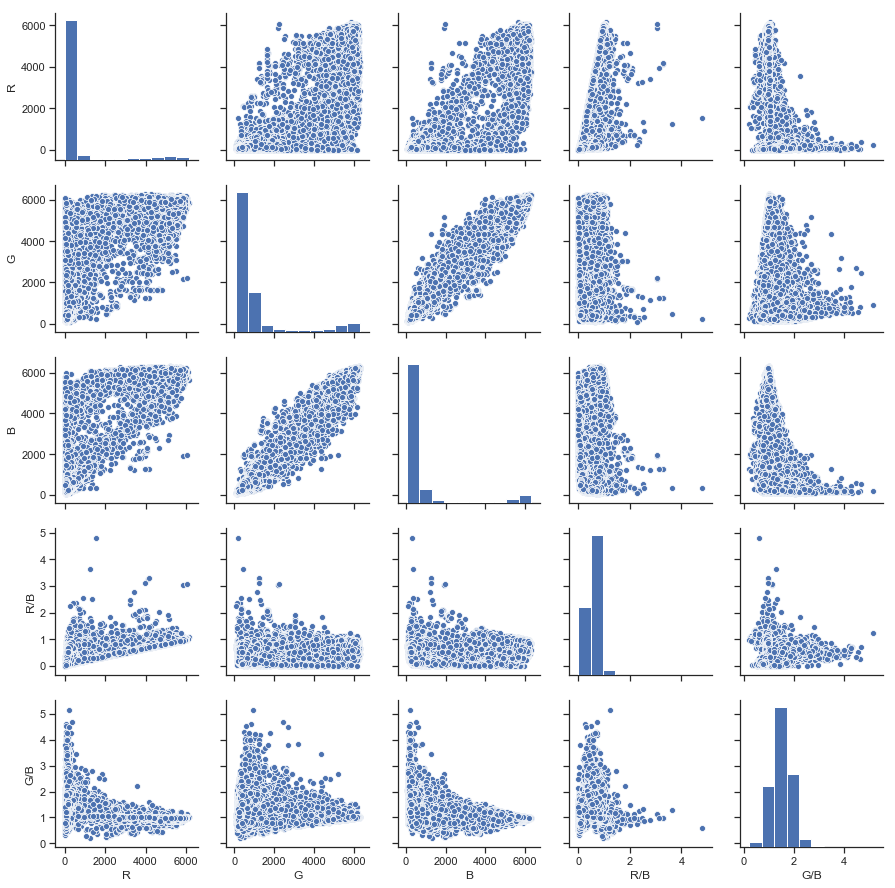

In [8]:
sns.set(style="ticks")
plt.figure(figsize=(20,20))
sns.pairplot(df)
# .savefig("output.png")
# plt.savefig("output_others.png")

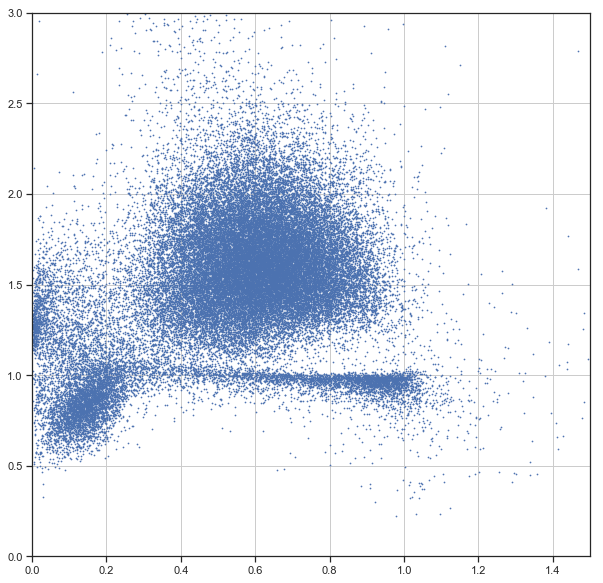

In [9]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.scatter(df['R/B'], df['G/B'], s=.5)
plt.xlim([0,1.5]);
plt.ylim([0,3]);

Text(0, 0.5, 'G/B')

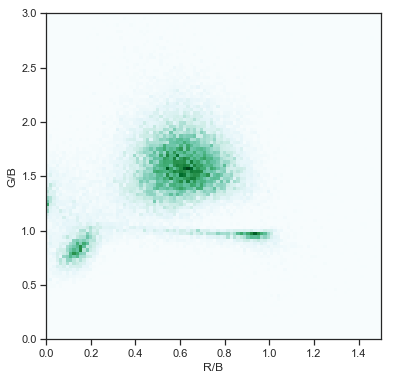

In [23]:
plt.figure(figsize=(6,6))
plt.hist2d(df['R/B'], df['G/B'],bins=10**2, range=([[0, 1.5], [0,3]]), cmap='BuGn');
plt.xlabel('R/B')
plt.ylabel('G/B')

- TSNE
- kmeans


# Filter in size

It seems that with that many labels, filtering in size might be a good idea

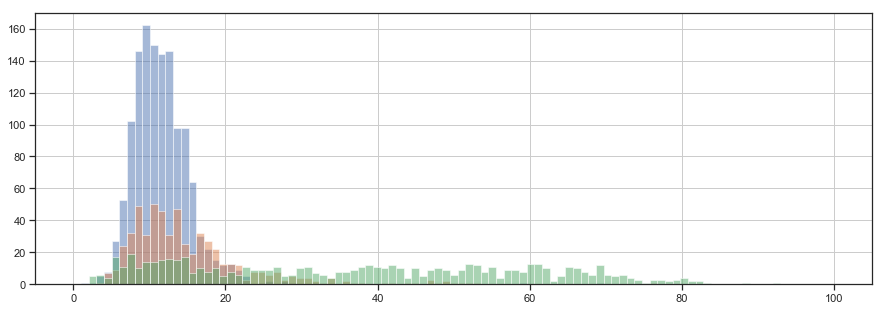

In [47]:
plt.figure(figsize=(15,5))
plt.hist(f3[f3['Annotation']=='Parasite']['size'],np.linspace(0,100,100),alpha=0.5);
plt.hist(f3[f3['Annotation']=='Platelet']['size'],np.linspace(0,100,100),alpha=0.5);
plt.hist(f3[f3['Annotation']=='Other']['size'],np.linspace(0,100,100),alpha=0.5);
plt.grid(True)

/Users/lucasfuentes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/lucasfuentes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/lucasfuentes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


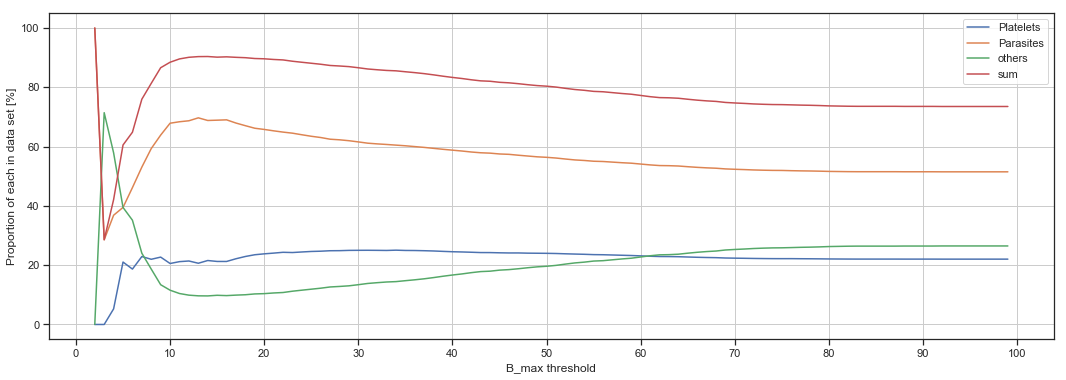

In [62]:
threshold_analysis_below(f3,'size',np.linspace(0,100,100))

/Users/lucasfuentes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/lucasfuentes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/lucasfuentes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


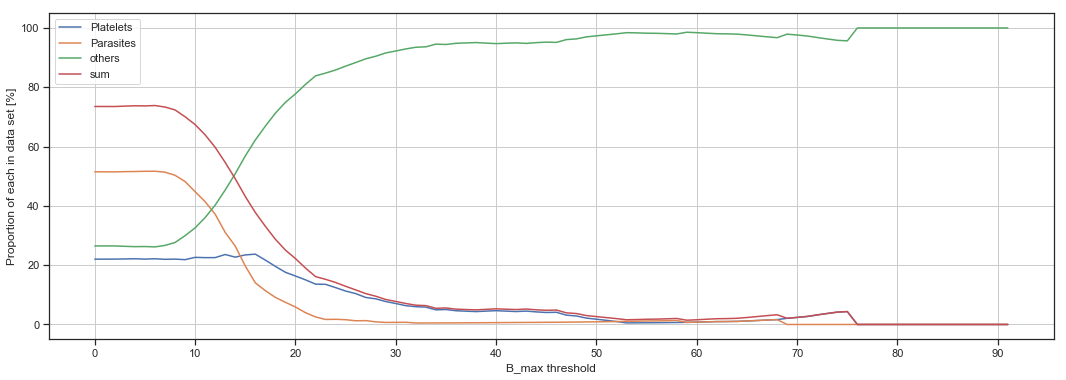

In [61]:
threshold_analysis_above(f3,'size',np.linspace(0,100,100))

In [63]:
th=20

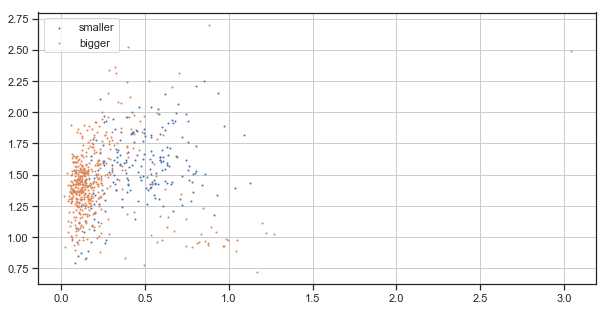

In [66]:
plt.figure(figsize=(10,5))
indx1=np.logical_and(f3['Annotation']=='Other',f3['size']<=th)
indx2=np.logical_and(f3['Annotation']=='Other',f3['size']>th)
plt.scatter(f3[indx1]['R/B'],f3[indx1]['G/B'],label='smaller',s=1)
plt.scatter(f3[indx2]['R/B'],f3[indx2]['G/B'],label='bigger',s=1)
plt.grid(True)
plt.legend()


In [67]:
f3_bis=f3[f3['size']<=th]

<Figure size 1440x1440 with 0 Axes>

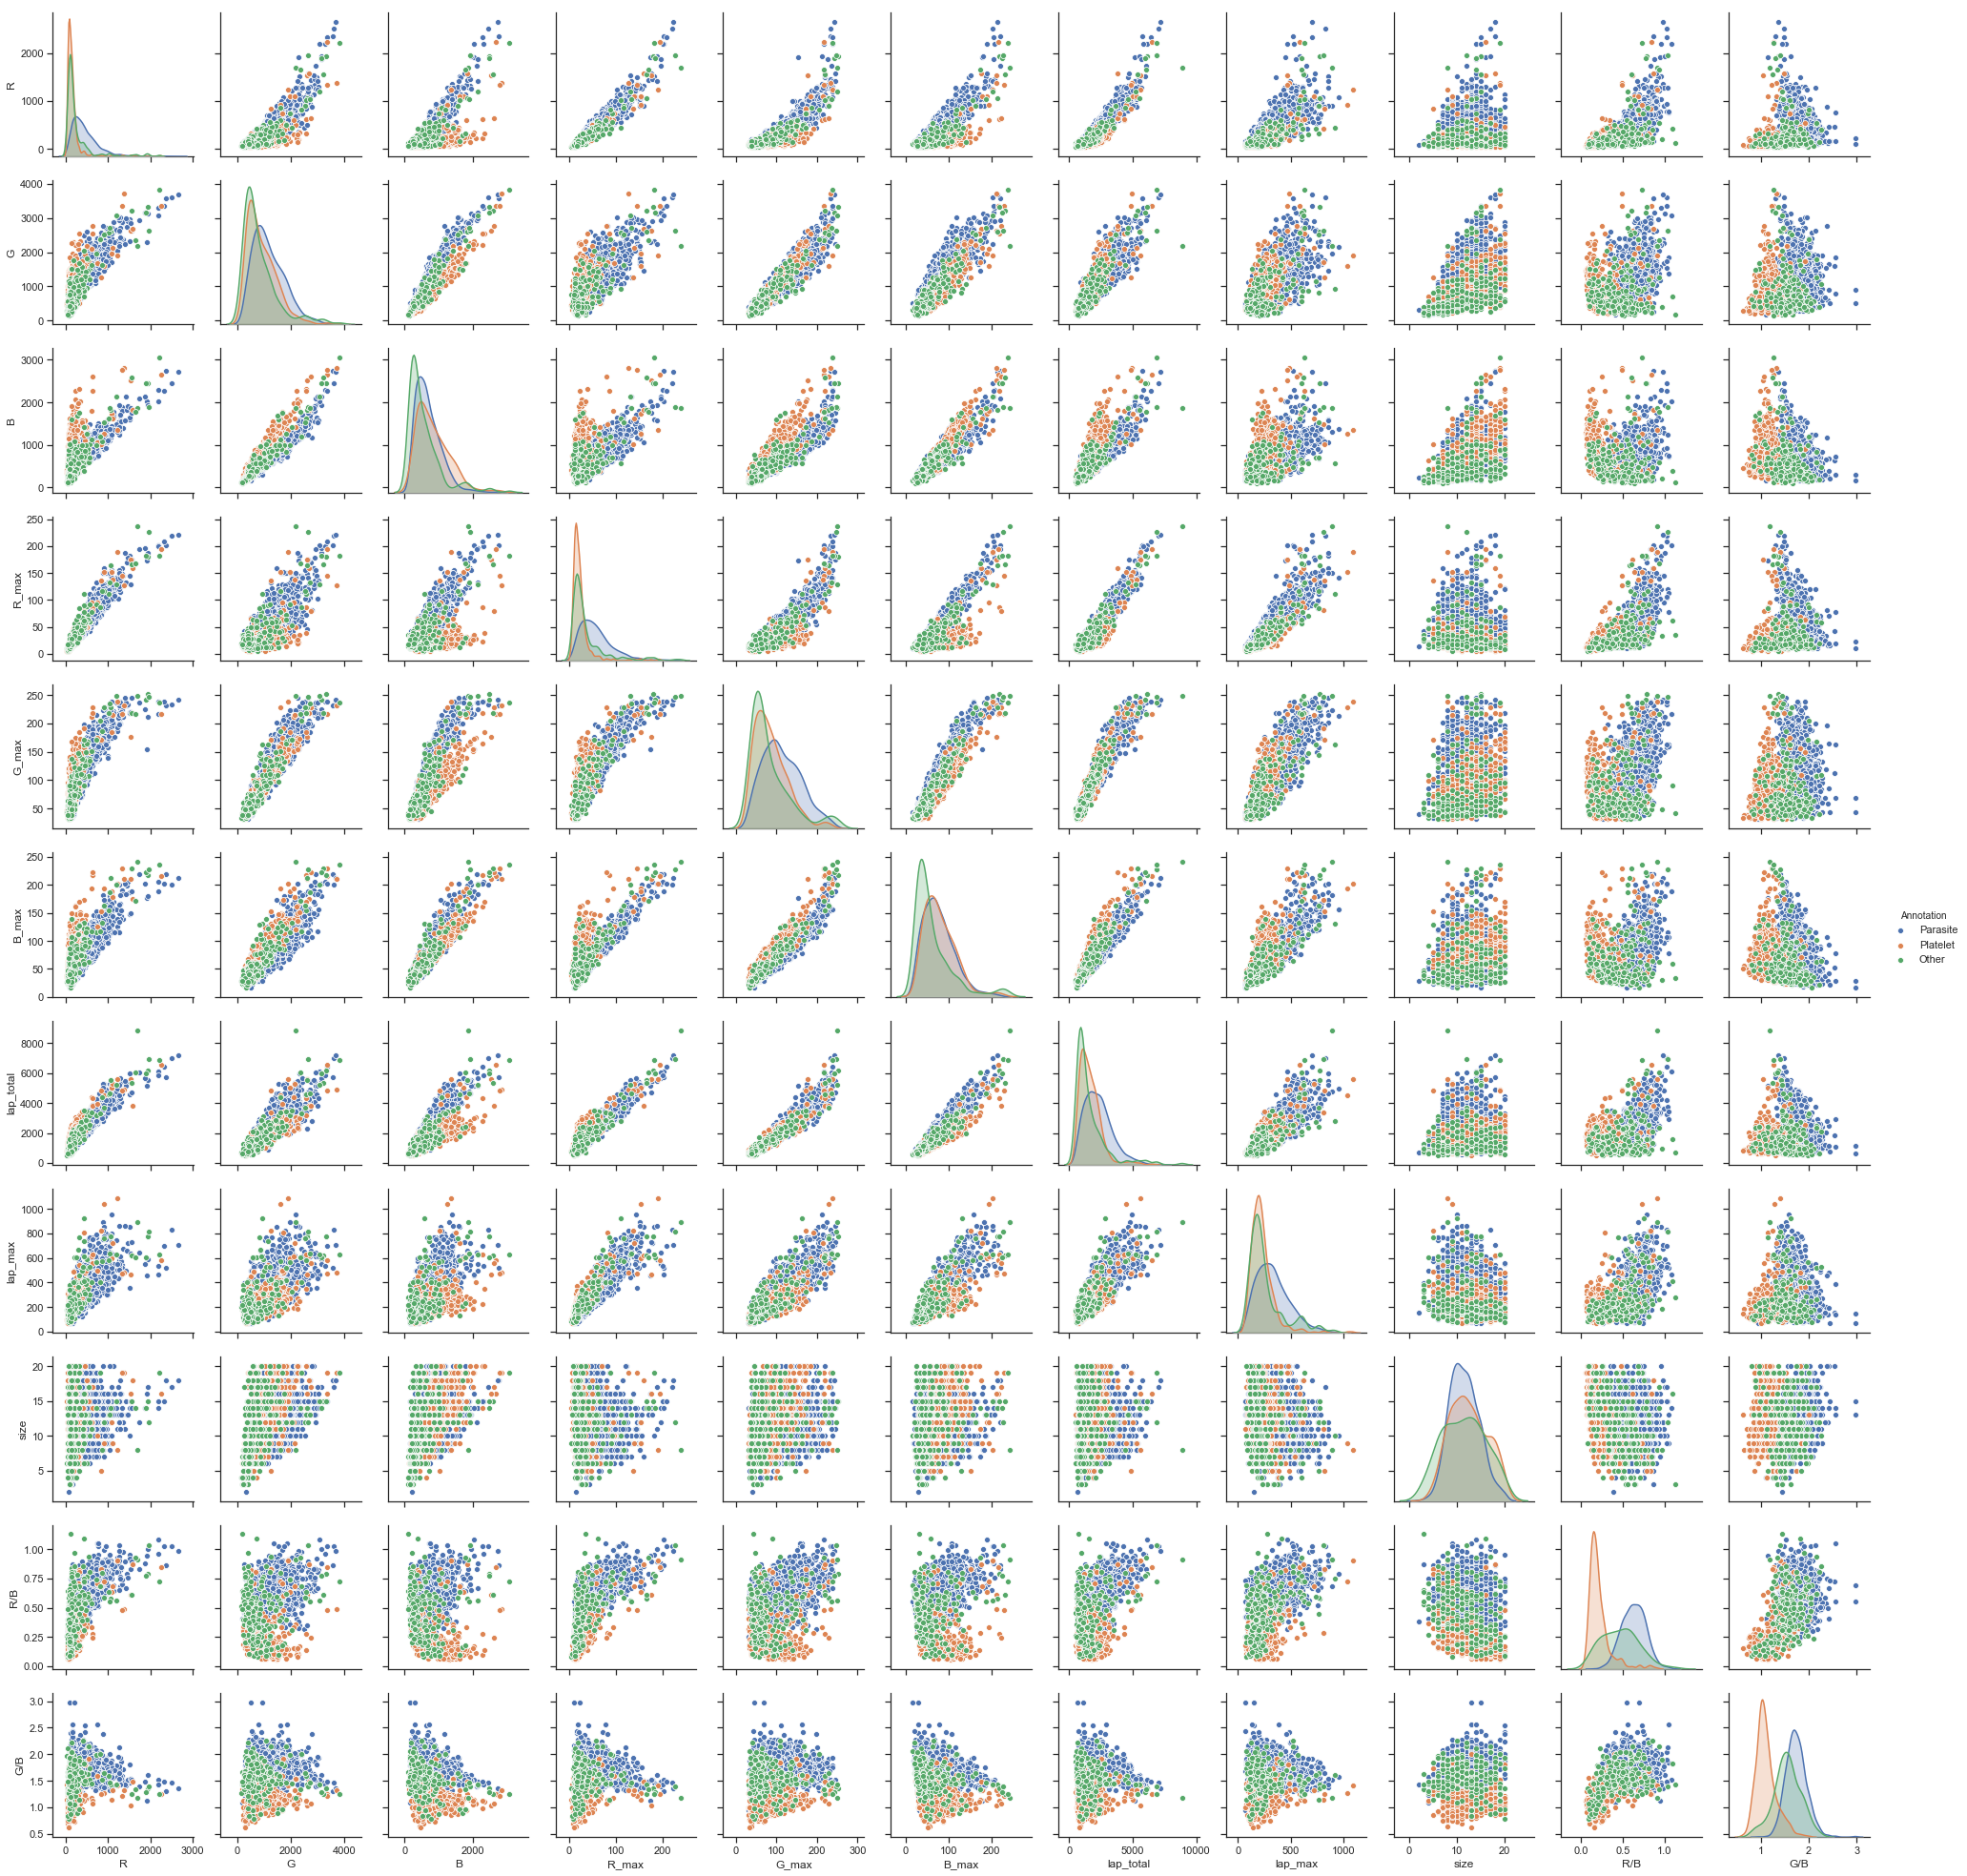

In [70]:
sns.set(style="ticks")
plt.figure(figsize=(20,20))
sns.pairplot(f3_bis, hue="Annotation")
# .savefig("output.png")
# plt.savefig("output_others.png")